## Diseño de la función objetivo que evalua la aptitud basada en la cobertura de incertidumbre de $n' \in N$ sensores 

In [1]:
#Cargando librerías 

import importlib
import positioning_sensors as ps
importlib.reload(ps)

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np


plt.style.use("ggplot")

 W = i*a^(p)


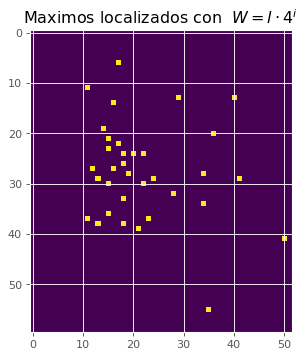

In [8]:
#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

luminance = ps.readIMG(ilumina)
importance = ps.readIMG(niveles,invert=True)

nonsat = ps.desaturate(luminance,th=62)
nonsat = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')

W1 = ps.f5(nonsat,importance,e=7)
seeds = ps.getMax(W1)

seeds_nonsat = ps.getMax(nonsat)
coords_nonsat = ps.get_coords(seeds_nonsat)

plt.figure(figsize=(5, 5), dpi=80)
plt.imshow(seeds*np.max(W1)/2+W1)
plt.imshow(seeds)
plt.title("Maximos localizados con  $W = l \cdot 4^i$ ")
plt.show()

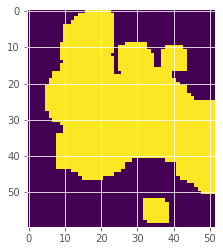

In [14]:
seeds_nonsat = nonsat>0
plt.imshow(seeds_nonsat)
coords = ps.get_coords(seeds_nonsat)

In [26]:
variogram3, varmask3 ,locations3 = ps.computeRegions(nonsat,coords,th = 0.5 ,atol=15,direction_delta = 2,verbose = True)

Coords  [ 0 16]
--
Coords  [ 0 17]
--
Coords  [ 0 18]
--
Coords  [ 0 19]
--
Coords  [ 0 20]
--
Coords  [ 0 21]
--
Coords  [ 0 22]
--
Coords  [ 1 14]
--
Coords  [ 1 15]
--
Coords  [ 1 16]
--
Coords  [ 1 17]
--
Coords  [ 1 18]
--
Coords  [ 1 19]
--
Coords  [ 1 20]
--
Coords  [ 1 21]
--
Coords  [ 1 22]
--
Coords  [ 1 23]
--
Coords  [ 2 13]
--
Coords  [ 2 14]
--
Coords  [ 2 15]
--
Coords  [ 2 16]
--
Coords  [ 2 17]
--
Coords  [ 2 18]
--
Coords  [ 2 19]
--
Coords  [ 2 20]
--
Coords  [ 2 21]
--
Coords  [ 2 22]
--
Coords  [ 2 23]
--
Coords  [ 3 12]
--
Coords  [ 3 13]
--
Coords  [ 3 14]
--
Coords  [ 3 15]
--
Coords  [ 3 16]
--
Coords  [ 3 17]
--
Coords  [ 3 18]
--
Coords  [ 3 19]
--
Coords  [ 3 20]
--
Coords  [ 3 21]
--
Coords  [ 3 22]
--
Coords  [ 3 23]
--
Coords  [ 4 10]
--
Coords  [ 4 11]
--
Coords  [ 4 12]
--
Coords  [ 4 13]
--
Coords  [ 4 14]
--
Coords  [ 4 15]
--
Coords  [ 4 16]
--
Coords  [ 4 17]
--
Coords  [ 4 18]
--
Coords  [ 4 19]
--
Coords  [ 4 20]
--
Coords  [ 4 21]
--
Coords  [ 4 

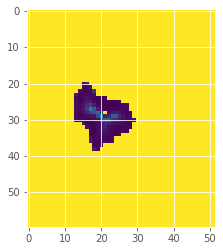

In [73]:
plt.imshow(1/(1+varmask3[800]))

[[ 3 14]]


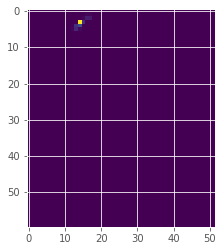

In [33]:
plt.imshow(varmask3[30]+locations3[30]*1000)
print(ps.get_coords(locations3[30]))

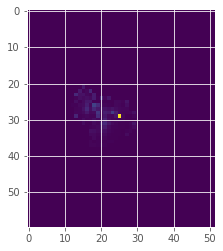

In [71]:
maxi = 0

for i,v in varmaskk3:
    s = np.sum((1/(1+varmask3[850])*(varmask3[850]>0))*W1)
    if maxi aflj
    
    
plt.imshow(m1)

In [ ]:

img = m1

fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(img)
for i in range((img.shape[0])):
    for j in range(img.shape[1]):
        text = ax.text(j, i, int(img[i, j]*100), ha="center", va="center", color="black")

fig.title(np.sum(img))
fig.tight_layout()
plt.show()

In [72]:
np.sum(img)

29373.033390568216

In [206]:
#searching and verifying valid coordinates 
#searching and verifying valid coordinates 

def validate_coordinates(iy,ix,coords=coords):
    iy = np.where(coords[:,0]==iy)
    ix = np.where(coords[:,1]==ix)

    ix = np.intersect1d(ix,iy)
    return ix

In [371]:
varmask = varmask3
def aptitude(X,nonsat=nonsat,varmask=varmask,only_aptitude=True):
    
    M = mapa(X, nonsat, varmask)
    
    #creamos n mapas binarios donde la cobertura de los sensores no se traslape
    mask = np.sum(M>0,axis=0)==1
    
 #   np.sum([mask]*len(M)*M)

    return -(np.sum([mask]*len(M)*M))

                    
def mapa(X,nonsat=nonsat,varmask=varmask,W1=ps.f5(nonsat,importance,e=7)):
    
    
    n_sensors = int(len(X)/2)
    
    sensor_list = X.reshape(n_sensors,len(nonsat.shape))
    
    coverage = np.zeros((n_sensors,nonsat.shape[0],nonsat.shape[1]))
    
    for i,s in enumerate(sensor_list):

        sy = s[0]
        sx = s[1]
        #sy,sx = s[0],s[1]
        ix = validate_coordinates(sy,sx)
        
        coverage[i] = np.zeros(nonsat.shape)
 
        if len(ix)>0: 
            map0to1 = 1/(1+varmask[ix]) 
            coverage[i] = map0to1*(map0to1<1)*W1

 
    return coverage    
    

 W = i*a^(p)


In [372]:
n_sensors = 2
X = np.array([np.random.randint(nonsat.shape) for i in np.arange(n_sensors)]).flatten()

print("testing solution:", X)

testing solution: [40 45 33 24]


In [369]:
mask = np.sum(a>0,axis=0)==1


np.sum([mask]*len(a)*a)

221285.70866894448

Text(0.5, 1.0, '-260853.7977735269')

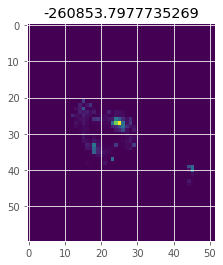

In [373]:
#[22 12 35  6]

#X = np.array([30, 30 ,20 ,20])
a = mapa(X) 

plt.imshow(np.max(a,axis=0))
plt.title(aptitude(X))

#type(X)

## Proof of concept: Solving Light Pollution Sensor Location

In [286]:
#!pip install geneticalgorithm
# for each locations, we have an associated region of minimum spatial variance. 

selected_locations = [np.random.randint((len(varmask))) for i in np.arange(9)]

fig, axs = plt.subplots(3, 3,figsize=(20,20))

for i,s in enumerate(selected_locations):
    sploty = i%3
    splotx = int(i/3)
    axs[sploty, splotx].imshow(varmask[s]>0)

plt.show()

In [500]:
# generating the boundaries for each sensor location from a total of 4
n_sensors
varbound=np.array([[0,nonsat.shape[0]],[0,nonsat.shape[1]]]*20)
varbound

array([[ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52]])

In [ ]:
from geneticalgorithm import geneticalgorithm as ga

dim = len(varbound)

model=ga(function=aptitude,dimension=dim,variable_type='int',variable_boundaries=varbound)

model.run()
    

|||||||___________________________________________ 13.3% GA is running...

In [436]:

X = model.output_dict["variable"]

    

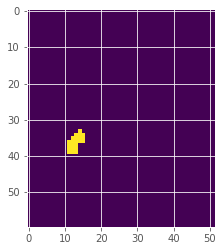

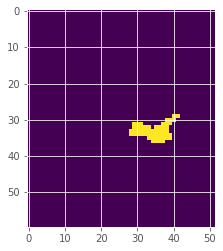

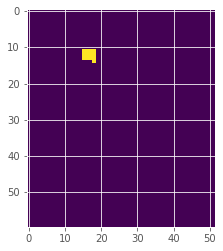

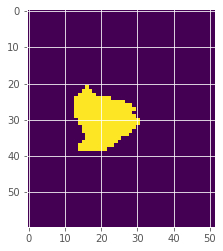

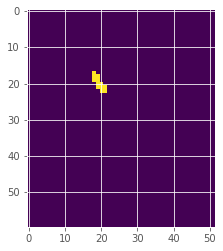

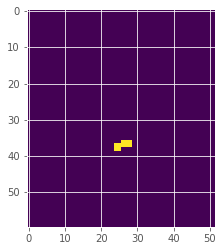

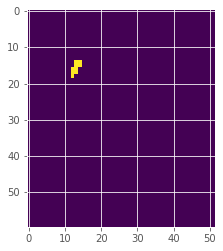

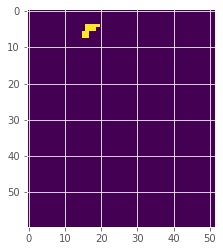

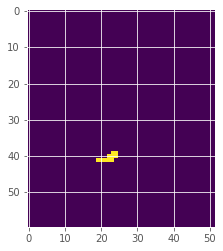

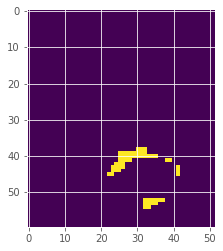

In [495]:
res = mapa(X)
empty= np.zeros((res[0].shape[0],res[0].shape[1]))
for i in res:
    empty = empty + (i>0)*1
    plt.imshow((i>0))
    plt.show()

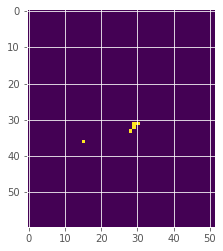

In [499]:
plt.imshow(empty==2)

In [454]:

plt.imshow((np.sum(res[0]>0),axis=0)+W1)
plt.show()

SyntaxError: invalid syntax (<ipython-input-454-9c4dfa6fbf54>, line 1)

In [433]:
plt.imshow(mapa(X)[19]>0)

IndexError: index 19 is out of bounds for axis 0 with size 10

Falta minimizar traslapes

In [ ]:
for p in X.reshape(4,2):

    nonsat[int(p[0])][int(p[1])]+=100

In [ ]:
plt.imshow(nonsat)

In [ ]:
import pandas as pd

plt.imshow(variogram[50])

In [ ]:

df = pd.DataFrame(varmask)

In [ ]:
plt.imshow(varmask[0])

In [ ]:
#flattenizing

fvm = [varmask[i].flatten() for i in range(len(varmask))]


In [ ]:
#storing in data frame
df = pd.DataFrame(fvm)

In [ ]:
#deflaterizing
varmask_example = np.array(df.iloc[0][:]).reshape(nonsat.shape)
plt.imshow(varmask_example)

In [ ]:
c= np.array([ps.get_coords(locations[i]) for i in range(len(locations)) ])
cf = c.flatten()
coords = cf.reshape(len(locations),2)
df.insert(0,"coordsy", coords[:,0])
df.insert(1,"coordsx", coords[:,1])

In [ ]:
df

In [ ]:
#df.to_csv("allcoversnonsatat15percent.csv")

In [484]:
df

,0,coordsx,coordsy,1,2,3,4,5,6,7,...,3110,3111,3112,3113,3114,3115,3116,3117,3118,3119
0,29.0,16,0,30.0,33.0,34.0,35.0,36.0,37.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,17,0,29.0,30.0,33.0,34.0,35.0,36.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.0,18,0,28.0,29.0,30.0,33.0,34.0,35.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,19,0,27.0,28.0,29.0,30.0,33.0,34.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.0,20,0,26.0,27.0,28.0,29.0,30.0,33.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,0.0,34,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,35.0,34.0,33.0,32.0,31.0,31.0,29.0,28.0,27.0
1580,0.0,35,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,36.0,35.0,34.0,33.0,32.0,31.0,31.0,29.0,28.0
1581,0.0,36,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,37.0,36.0,35.0,34.0,33.0,32.0,31.0,31.0,29.0
1582,0.0,37,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.0,37.0,37.0,36.0,35.0,34.0,33.0,32.0,31.0,31.0


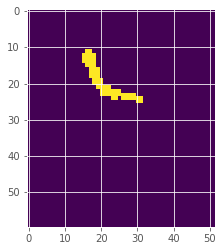

In [608]:
plt.imshow(varmask[500]>0)

$$\sum_{W}_i^{j}(\frac{1}{1/(1+var_i)})$$

$$\underset{\mathbf{U}=\{u_1,\dots,u_N\}}{\text{ arg min }} \sum_{i=1}^M \alpha_i \sum_{j=1}^{N-1} w_{u_j}^i = \sum_{j=1}^{N-1} A^T W_{u_j}$$ $$ \text{s.t. } {u_i}\in S,  ; \sum_{i=1}^M a_i= 1 : a_i>0$$

set of locations 

$$s_i \subset A$$


$$ \mathbf{S} = \{s_i\}_{i=0}^{M}$$ and $$|\mathbf{S}|=M$$